# Análisis espectral

Partiendo de las tres señales de audio grabadas, se determinó una manera de obtener curvas de nivel
de presión sonora en función del tiempo utilizando el lenguaje de programación python, tanto para el ruido de fondo como para el ruido
rosa.

In [86]:
import filters 
import numpy as np
import spl_time
import librosa
import os
import matplotlib.pyplot as plt
import pandas as pd

Se diseño un banco de filtros de octava y un banco de filtros de tercio de octava según la
norma $ISO$ $61260$ utilizando el lenguaje python guardado en el módulo $filters.py$.

In [99]:
csv = os.path.join("cheat", "tercios.csv")
tercios = pd.read_csv(csv)
tercios.sort_values(by='f_norm', inplace=True)
tercios

,f_norm,clase_0_inf,clase_0_sup,clase_1_inf,clase_1_sup,clase_2_inf,clase_2_sup
12,0.32578,62.00,100.00,61.0,100.0,55.0,100.0
10,0.52996,42.50,100.00,42.0,100.0,41.0,100.0
8,0.77181,18.00,100.00,17.5,100.0,16.5,100.0
6,0.91932,-0.15,1.10,-0.3,1.3,-0.5,1.6
4,0.94702,-0.15,0.40,-0.3,0.6,-0.5,0.8
2,0.97394,-0.15,0.20,-0.3,0.4,-0.5,0.6
0,1.00000,-0.15,0.15,-0.3,0.3,-0.5,0.5
1,1.02676,-0.15,0.20,-0.3,0.4,-0.5,0.6
3,1.05594,-0.15,0.40,-0.3,0.6,-0.5,0.8
5,1.08776,-0.15,1.10,-0.3,1.3,-0.5,1.6


In [176]:
from scipy.signal import freqz

fs=48000

b, a = filters.butter_filter("bandpass", fs, 3, (88.39, 111.4))
freq = np.linspace(0, 0.5 * fs, 10000)  # Generate a frequency vector
w, h = freqz(b, a, worN=freq, fs=fs)  # Compute the frequency response

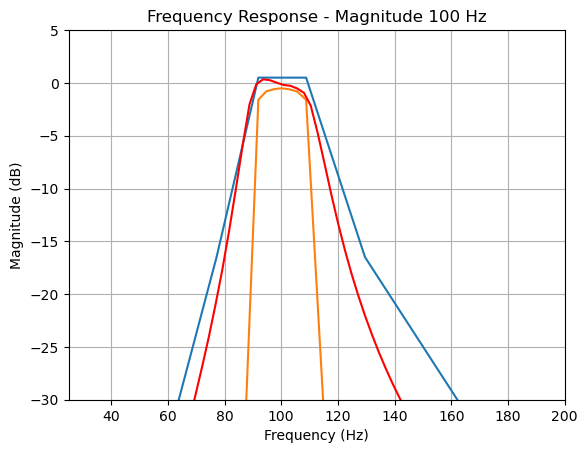

In [177]:
plt.plot(100*tercios.f_norm.values, -tercios.clase_2_inf.values)
plt.plot(100*tercios.f_norm.values, -tercios.clase_2_sup.values)
plt.plot(freq, 20 * np.log10(abs(h)), color="red")  # Plot the magnitude response in dB
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title(f'Frequency Response - Magnitude 100 Hz')
plt.ylim(-30, 5)  # Set the y-axis limits
plt.xlim(25, 200)
plt.grid(True)
plt.show()

In [167]:
b2, a2 = filters.butter_filter("bandpass", fs, 4, (17959, 22627))
freq = np.linspace(0, 0.5 * fs, 10000)  # Generate a frequency vector
w2, h2 = freqz(b2, a2, worN=freq, fs=fs)  # Compute the frequency response

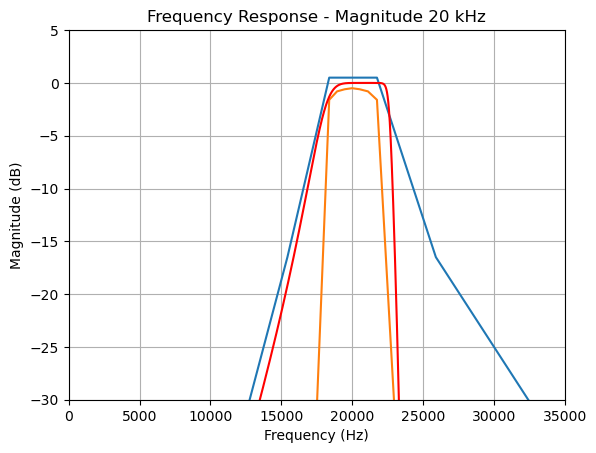

In [168]:
plt.plot(20000*tercios.f_norm.values, -tercios.clase_2_inf.values)
plt.plot(20000*tercios.f_norm.values, -tercios.clase_2_sup.values)
plt.plot(freq, 20 * np.log10(abs(h2)), color="red")  # Plot the magnitude response in dB
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title(f'Frequency Response - Magnitude 20 kHz')
plt.ylim(-30, 5)  # Set the y-axis limits
plt.xlim(0, 35000)
plt.grid(True)
plt.show()

Se filtran las señales de ruido rosa y de ruido de fondo utilizando los bancos de filtros ante-
riormente creados. Luego se obtienen los niveles equivalentes por banda. Finalmente, se confecciona gráficos de barras en donde se comparan los niveles equivalentes por bandas para las dos señales (un gráfico para divisiones de octava, y otro para divisiones de tercio
de octava).

In [6]:
freq = ["31.5","40","50","63","80","100","125","160","200","250","315","400","500","630","800","1000","1250","1600","2000","2500","3150","4000","5000","6300","8000","10000", "12500", "16000", "20000"]
cutoff_frequencies = [(27.84, 35.08), (35.08, 44.19), (44.19, 55.68), (55.68, 70.15), (70.15, 88.39), (88.39, 111.4), (111.4, 140.3), (140.3, 176.8), (176.8, 222.7), (222.7, 280.6), (280.6, 353.6), (353.6, 445.4), (445.4, 561.2), (561.2, 707.1), (707.1, 890.9), (890.9, 1122), (1122, 1414), (1414, 1782), (1782, 2245), (2245, 2828), (2828, 3564), (3564, 4490), (4490, 5657), (5657, 7127), (7127, 8980), (8980, 11314), (11314, 14254), (14256, 17959), (17959, 22627)]

In [7]:
# Calibration

ap_calibration_1 = os.path.join("grabaciones","posicion 1","puretone position FRONT.wav")
ap_calibration_2 = os.path.join("grabaciones","posicion 1","puretone position BACK R.wav")

# Position 1

ap_pink_bl_1 = os.path.join("grabaciones","posicion 1","pinknoise position BACK L.wav") 
ap_pink_br_1 = os.path.join("grabaciones","posicion 1","pinknoise position BACK R.wav")
ap_floor_bl_1 = os.path.join("grabaciones","posicion 1","background position BACK L.wav")
ap_floor_br_1 = os.path.join("grabaciones","posicion 1","background position BACK R.wav")

# Position 2

ap_pink_bl_2 = os.path.join("grabaciones","posicion 2","pinknoise position BACK L.wav") 
ap_pink_br_2 = os.path.join("grabaciones","posicion 2","pinknoise position BACK R.wav")
ap_floor_bl_2 = os.path.join("grabaciones","posicion 2","background position BACK L.wav")
ap_floor_br_2 = os.path.join("grabaciones","posicion 2","background position BACK R.wav")

In [8]:
# Load the audios
# Cal

audio_calibration_1 ,sr = librosa.load(ap_calibration_1, sr=None)
audio_calibration_2 ,sr = librosa.load(ap_calibration_2, sr=None)

# Pos 1

audio_pink_bl_1 , sr = librosa.load(ap_pink_bl_1, sr=None)
audio_pink_br_1 , sr = librosa.load(ap_pink_br_1, sr=None)
audio_floor_bl_1 , sr = librosa.load(ap_floor_bl_1, sr=None)
audio_floor_br_1 , sr = librosa.load(ap_floor_br_1, sr=None)

# Pos 2

audio_pink_bl_2 , sr = librosa.load(ap_pink_bl_2, sr=None)
audio_pink_br_2 , sr = librosa.load(ap_pink_br_2, sr=None)
audio_floor_bl_2 , sr = librosa.load(ap_floor_bl_2, sr=None)
audio_floor_br_2 , sr = librosa.load(ap_floor_br_2, sr=None)

In [9]:
# Calibration. Mic 1
audio_pink_bl_1 = spl_time.calibration(audio_pink_bl_1, audio_calibration_1)
audio_floor_bl_1 = spl_time.calibration(audio_floor_bl_1, audio_calibration_1)
audio_pink_bl_2 = spl_time.calibration(audio_pink_bl_2, audio_calibration_1)
audio_floor_bl_2 = spl_time.calibration(audio_floor_bl_2, audio_calibration_1)

# Calibration. Mic 2
audio_pink_br_1 = spl_time.calibration(audio_pink_br_1, audio_calibration_2)
audio_floor_br_1 = spl_time.calibration(audio_floor_br_1, audio_calibration_2)
audio_pink_br_2 = spl_time.calibration(audio_pink_br_2, audio_calibration_2)
audio_floor_br_2 = spl_time.calibration(audio_floor_br_2, audio_calibration_2)

In [10]:
# Filtering pink noise

rms_global_pink_bl_1 = np.zeros(len(freq), dtype=float)
rms_global_pink_bl_2 = np.zeros(len(freq), dtype=float)
rms_global_pink_br_1 = np.zeros(len(freq), dtype=float)
rms_global_pink_br_2 = np.zeros(len(freq), dtype=float)

for i in range(len(cutoff_frequencies)):
    
    b, a = filters.butter_filter("bandpass", sr, 2, cutoff_frequencies[i])
    audio_filtered = filters.apply_filter(b, a, audio_pink_bl_1)
    
    rms = np.sqrt(np.mean(np.square(audio_filtered)))
    rms_spl = 20 * np.log10(rms / 20e-6)
    
    rms_global_pink_bl_1[i] = rms_spl
    
for i in range(len(cutoff_frequencies)):
    
    b, a = filters.butter_filter("bandpass", sr, 2, cutoff_frequencies[i])
    audio_filtered = filters.apply_filter(b, a, audio_pink_br_1)
    
    rms = np.sqrt(np.mean(np.square(audio_filtered)))
    rms_spl = 20 * np.log10(rms / 20e-6)
    
    rms_global_pink_br_1[i] = rms_spl

for i in range(len(cutoff_frequencies)):
    
    b, a = filters.butter_filter("bandpass", sr, 2, cutoff_frequencies[i])
    audio_filtered = filters.apply_filter(b, a, audio_pink_bl_2)
    
    rms = np.sqrt(np.mean(np.square(audio_filtered)))
    rms_spl = 20 * np.log10(rms / 20e-6)
    
    rms_global_pink_bl_2[i] = rms_spl

for i in range(len(cutoff_frequencies)):
    
    b, a = filters.butter_filter("bandpass", sr, 2, cutoff_frequencies[i])
    audio_filtered = filters.apply_filter(b, a, audio_pink_br_2)
    
    rms = np.sqrt(np.mean(np.square(audio_filtered)))
    rms_spl = 20 * np.log10(rms / 20e-6)
    
    rms_global_pink_br_2[i] = rms_spl

In [11]:
# Mean global RMS for pink noise

rms_global_pink = (rms_global_pink_bl_1 + rms_global_pink_bl_2 + rms_global_pink_br_1 + rms_global_pink_br_2) / 4

In [25]:
# Sigmas mic take, pink noise
sigmas_pink = np.zeros(len(rms_global_pink_bl_1))

for i in range(len(rms_global_pink_bl_1)):
    sigmas_pink[i] = 2*np.std([rms_global_pink_bl_1[i],rms_global_pink_bl_2[i],rms_global_pink_br_1[i],rms_global_pink_br_2[i]])

In [12]:
# Filtering noise floor

rms_global_floor_bl_1 = np.zeros(len(freq), dtype=float)
rms_global_floor_bl_2 = np.zeros(len(freq), dtype=float)
rms_global_floor_br_1 = np.zeros(len(freq), dtype=float)
rms_global_floor_br_2 = np.zeros(len(freq), dtype=float)

for i in range(len(cutoff_frequencies)):
    
    b, a = filters.butter_filter("bandpass", sr, 2, cutoff_frequencies[i])
    audio_filtered = filters.apply_filter(b, a, audio_floor_bl_1)
    
    rms = np.sqrt(np.mean(np.square(audio_filtered)))
    rms_spl = 20 * np.log10(rms / 20e-6)
    
    rms_global_floor_bl_1[i] = rms_spl
    
for i in range(len(cutoff_frequencies)):
    
    b, a = filters.butter_filter("bandpass", sr, 2, cutoff_frequencies[i])
    audio_filtered = filters.apply_filter(b, a, audio_floor_br_1)
    
    rms = np.sqrt(np.mean(np.square(audio_filtered)))
    rms_spl = 20 * np.log10(rms / 20e-6)
    
    rms_global_floor_br_1[i] = rms_spl

for i in range(len(cutoff_frequencies)):
    
    b, a = filters.butter_filter("bandpass", sr, 2, cutoff_frequencies[i])
    audio_filtered = filters.apply_filter(b, a, audio_floor_bl_2)
    
    rms = np.sqrt(np.mean(np.square(audio_filtered)))
    rms_spl = 20 * np.log10(rms / 20e-6)
    
    rms_global_floor_bl_2[i] = rms_spl

for i in range(len(cutoff_frequencies)):
    
    b, a = filters.butter_filter("bandpass", sr, 2, cutoff_frequencies[i])
    audio_filtered = filters.apply_filter(b, a, audio_floor_br_2)
    
    rms = np.sqrt(np.mean(np.square(audio_filtered)))
    rms_spl = 20 * np.log10(rms / 20e-6)
    
    rms_global_floor_br_2[i] = rms_spl

In [13]:
# Mean global RMS for noise floor

rms_global_floor = (rms_global_floor_bl_1 + rms_global_floor_bl_2 + rms_global_floor_br_1 + rms_global_floor_br_2) / 4

In [23]:
# Sigmas, mic take, noise floor
sigmas_floor = np.zeros(len(rms_global_floor_bl_1))

for i in range(len(rms_global_floor_bl_1)):
    sigmas_floor[i] = 2*np.std([rms_global_floor_bl_1[i],rms_global_floor_bl_2[i],rms_global_floor_br_1[i],rms_global_floor_br_2[i]])


In [18]:
# Noise floor sonometer
L_floor_1 = np.array([48.6, 46.6, 40.8, 43.0, 39.3, 39.5, 42.5, 42.2, 35.0, 36.7, 34.9, 34.1, 32.9, 30.6, 26.1, 25.0, 24.2, 22.5, 20.3, 20.8, 19.5, 17.3, 14.8, 14.3, 14.7, 15.6, 15.6, 15.9, 14.1])
L_floor_2 = np.array([47.5, 47.7, 42.7, 45.8, 37.7, 35.1, 38.6, 39.6, 37.5, 34.0, 36.9, 39.1, 39.9, 38.7, 34.6, 30.8, 31.7, 28.3, 27.5, 27.8, 25.3, 21.1, 17.4, 17.6, 17.7, 17.7, 17.1, 18.1, 14.5])
R_floor_1 = np.array([48.6, 49.6, 44.3, 46.0, 37.8, 37.4, 43.5, 43.9, 37.0, 36.1, 33.0, 31.5, 33.4, 29.6, 25.9, 25.5, 24.0, 22.3, 21.9, 22.0, 20.6, 19.6, 17.3, 16.6, 17.0, 17.5, 17.4, 17.1, 15.4])
R_floor_2 = np.array([52.5, 50.7, 44.0, 49.0, 40.4, 37.4, 49.3, 52.9, 44.1, 42.1, 44.2, 42.6, 42.1, 40.1, 34.4, 30.8, 32.5, 32.8, 33.3, 34.0, 33.6, 29.6, 30.3, 31.1, 31.1, 27.0, 25.4, 21.6, 17.5])

# Noise floor average
floor_avg = (L_floor_1 + L_floor_2 + R_floor_1 + R_floor_2) / 4

# Pink noise sonometer
L_pink_1 = np.array([51.6, 55.9, 54.7, 61.0, 65.7, 80.4, 77.7, 76.4, 72.5, 69.5, 70.7, 70.8, 70.4, 68.9, 70.0, 66.5, 64.4, 63.8, 66.4, 65.7, 64.7, 64.6, 65.7, 66.0, 64.7, 64.8, 64.2, 64.2, 52.9])
L_pink_2 = np.array([58.7, 60.4, 54.5, 59.1, 64.7, 76.5, 76.7, 74.9, 70.6, 71.0, 69.9, 68.2, 69.0, 69.6, 67.6, 65.8, 63.3, 64.1, 65.2, 66.3, 66.2, 65.6, 66.9, 67.3, 65.4, 64.9, 64.6, 64.5, 53.1])
R_pink_1 = np.array([50.3, 55.7, 62.5, 67.3, 66.4, 84.6, 83.4, 80.9, 77.1, 73.8, 76.6, 76.1, 76.7, 73.4, 72.3, 72.2, 66.7, 68.6, 69.1, 70.6, 70.0, 68.4, 70.3, 70.8, 70.7, 69.6, 68.6, 68.0, 55.3])
R_pink_2 = np.array([50.0, 58.3, 55.8, 63.2, 69.1, 78.2, 78.1, 72.3, 70.0, 68.8, 70.8, 70.1, 70.0, 69.9, 65.8, 65.5, 63.0, 64.2, 66.6, 65.7, 66.5, 65.8, 67.6, 68.1, 67.3, 66.1, 66.1, 65.7, 51.0])

# Pink noise average
pink_avg = (L_pink_1 + L_pink_2 + R_pink_1 + R_pink_2) / 4

In [27]:
# Sigmas, sonometer, pink noise
sigmas_pink_sonometer = np.zeros(len(rms_global_pink_bl_1))

for i in range(len(rms_global_pink_bl_1)):
    sigmas_pink_sonometer[i] = 2*np.std([L_pink_1[i],L_pink_2[i],R_pink_1[i],R_pink_2[i]])
    
# Sigmas, sonometer, noise floor
sigmas_floor_sonometer = np.zeros(len(rms_global_pink_bl_1))

for i in range(len(rms_global_pink_bl_1)):
    sigmas_floor_sonometer[i] = 2*np.std([L_floor_1[i],L_floor_2[i],R_floor_1[i],R_floor_2[i]])

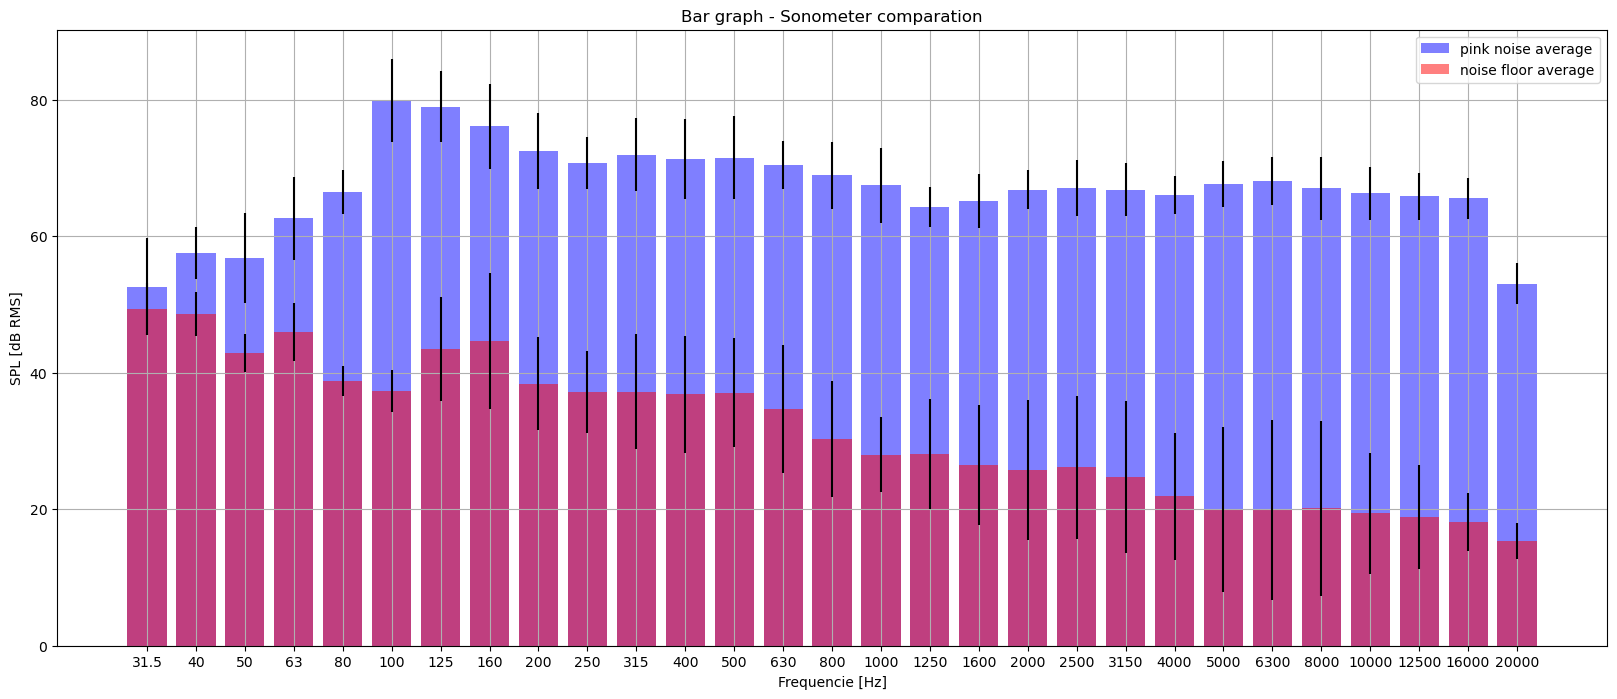

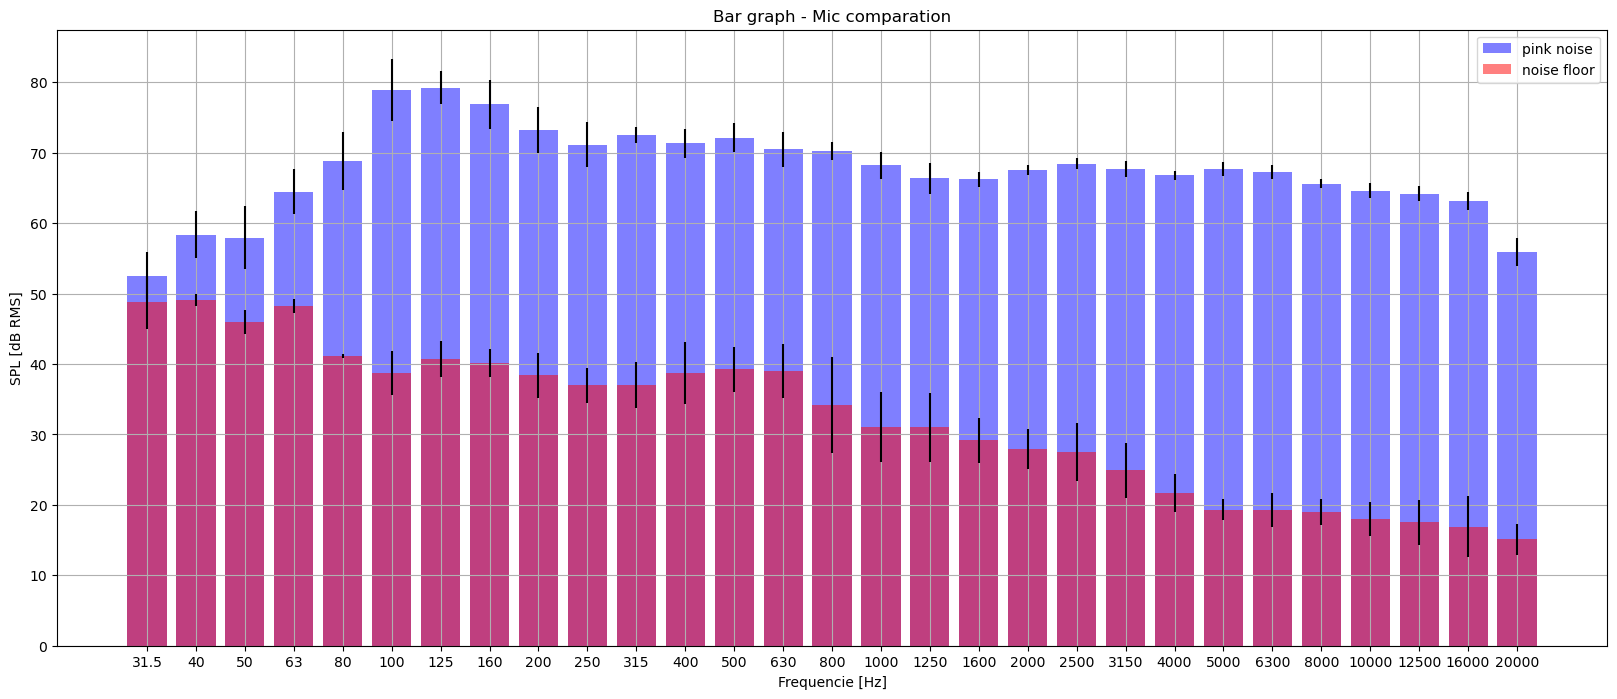

In [29]:
# Plot the data
# Somoneter
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(x=freq, height=pink_avg, yerr=sigmas_pink_sonometer, color='blue', label='pink noise average', alpha=0.5)
ax.bar(x=freq, height=floor_avg, yerr=sigmas_floor_sonometer, color='red', label='noise floor average', alpha=0.5)
ax.set_xlabel('Frequencie [Hz]')
ax.set_ylabel('SPL [dB RMS]')
ax.set_title('Bar graph - Sonometer comparation')
ax.legend()
ax.grid()

# Mic
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(x=freq, height=rms_global_pink,yerr=sigmas_pink, color='blue',alpha=0.5, label='pink noise')
ax.bar(x=freq, height=rms_global_floor,yerr=sigmas_floor,alpha=0.5, color='red', label='noise floor')
ax.set_xlabel('Frequencie [Hz]')
ax.set_ylabel('SPL [dB RMS]')
ax.set_title('Bar graph - Mic comparation')
ax.legend()
ax.grid()

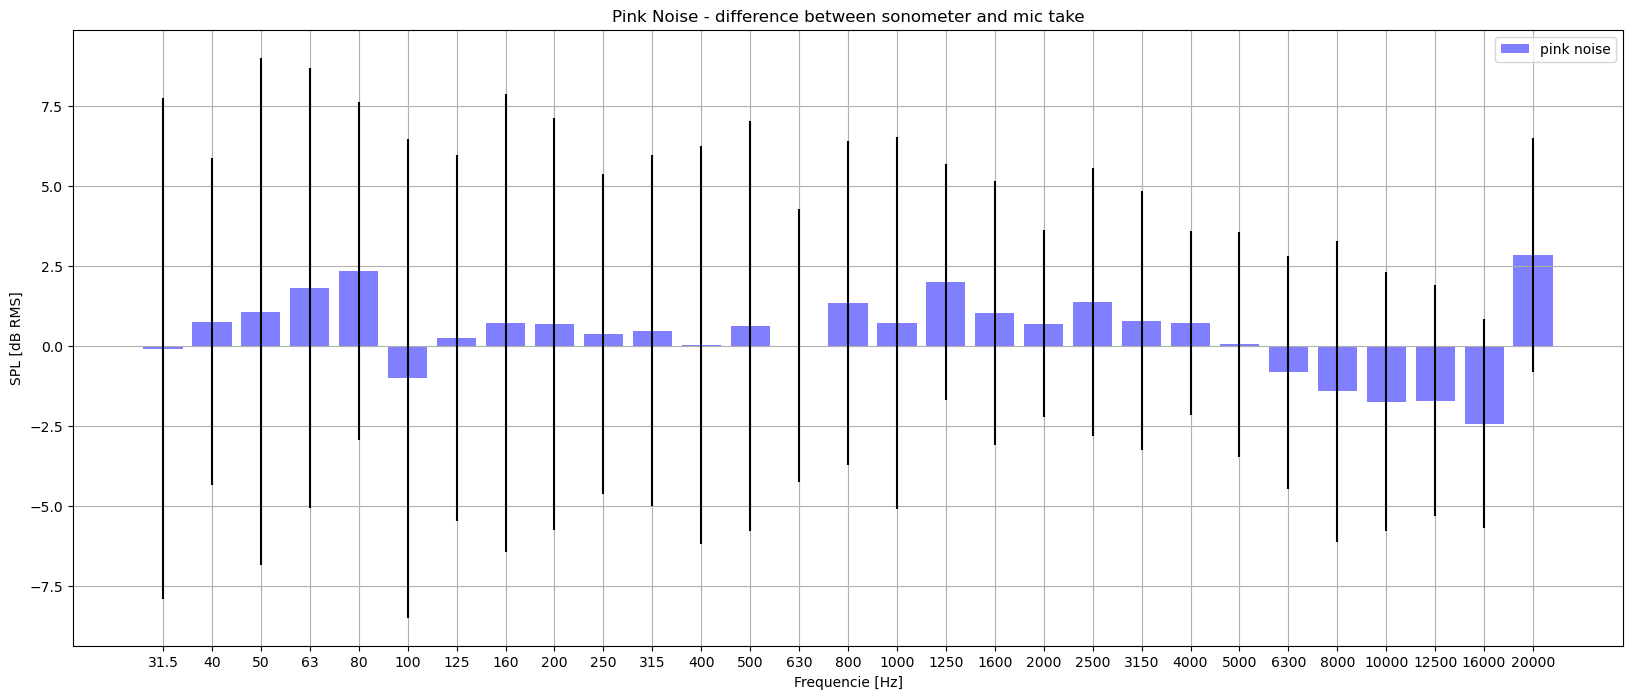

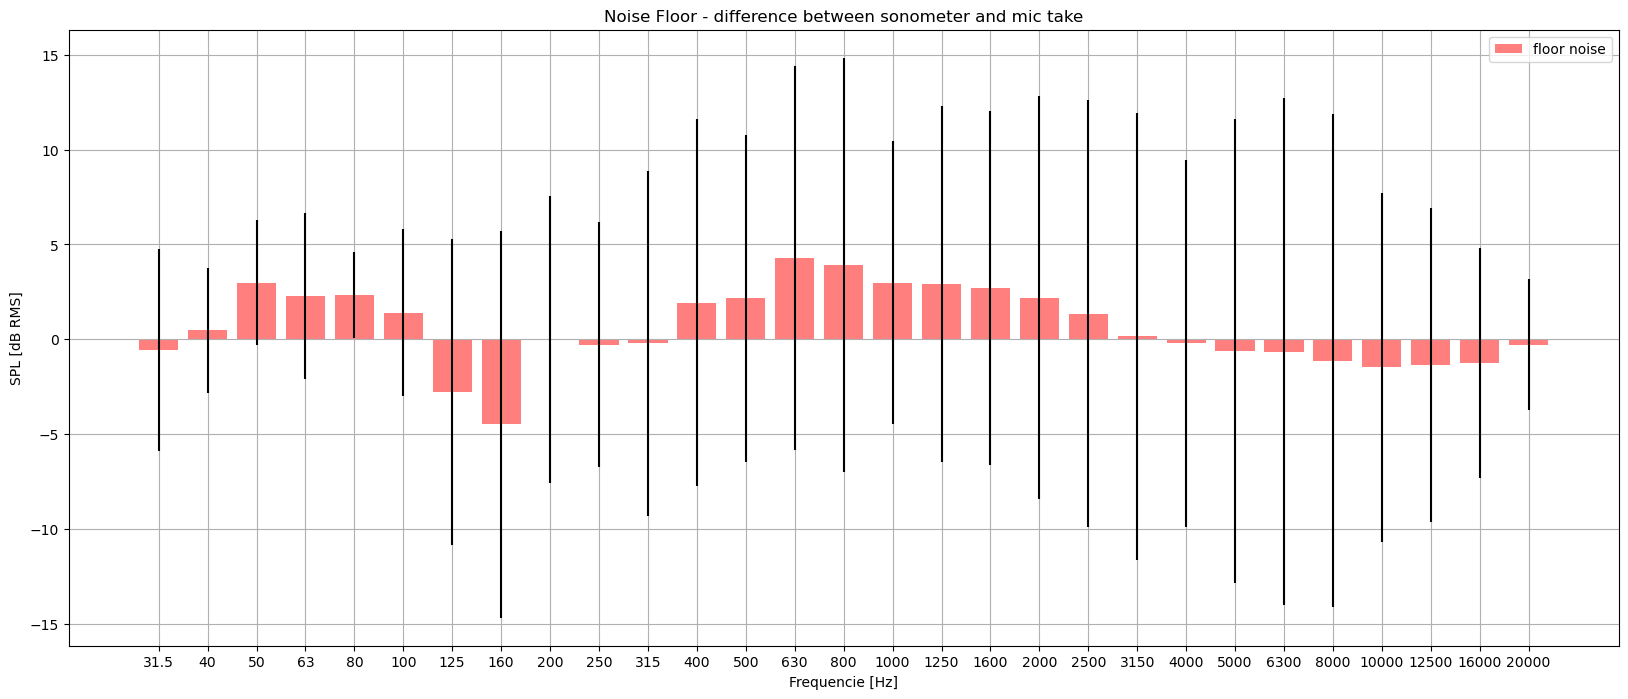

In [38]:
# Difference between mic take and sonometer

diff_pink = rms_global_pink - pink_avg
diff_floor = rms_global_floor - floor_avg

# Error propagation
diff_sig_pink = np.zeros(len(sigmas_pink))
diff_sig_floor = np.zeros(len(sigmas_pink))

for i in range(len(sigmas_pink)):
    diff_sig_pink[i] = np.sqrt((sigmas_pink_sonometer[i]**2) + (sigmas_pink[i]**2))
    diff_sig_floor[i] = np.sqrt((sigmas_floor_sonometer[i]**2) + (sigmas_floor[i]**2))

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(x=freq, height=diff_pink,yerr=diff_sig_pink, color='blue',alpha=0.5, label='pink noise')
ax.set_xlabel('Frequencie [Hz]')
ax.set_ylabel('SPL [dB RMS]')
ax.set_title('Pink Noise - difference between sonometer and mic take')
ax.legend()
ax.grid()

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(x=freq, height=diff_floor,yerr=diff_sig_floor, color='red',alpha=0.5, label='floor noise')
ax.set_xlabel('Frequencie [Hz]')
ax.set_ylabel('SPL [dB RMS]')
ax.set_title('Noise Floor - difference between sonometer and mic take')
ax.legend()
ax.grid()

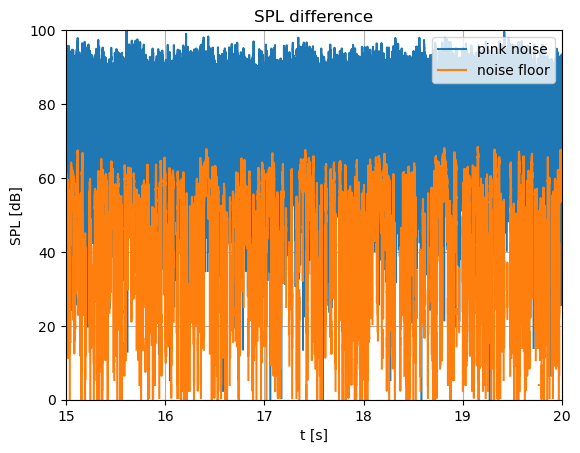

In [40]:
# Change to db
t_pink, audio_pink_db = spl_time.spl_time(sr, audio_pink_bl_1)
t_floor, audio_floor_db = spl_time.spl_time(sr, audio_floor_bl_1)

# Plot both mesurements
plt.plot(t_pink, audio_pink_db, label="pink noise")
plt.plot(t_floor, audio_floor_db, label="noise floor")
plt.xlim(15, 20)
plt.ylim(0, 100)
plt.grid()
plt.legend(loc="upper right")
plt.title("SPL difference")
plt.xlabel("t [s]")
plt.ylabel("SPL [dB]")
plt.show()